# **Instructions**

This document is a template, and you are not required to follow it exactly. However, the kinds of questions we ask here are the kinds of questions we want you to focus on. While you might have answered similar questions to these in your project presentations, we want you to go into a lot more detail in this write-up; you can refer to the Lab homeworks for ideas on how to present your data or results. 

You don't have to answer every question in this template, but you should answer roughly this many questions. Your answers to such questions should be paragraph-length, not just a bullet point. You likely still have questions of your own -- that's okay! We want you to convey what you've learned, how you've learned it, and demonstrate that the content from the course has influenced how you've thought about this project.

# Project Name
Project mentor: Gordon Sun

Louise Lu <ylu106@jh.edu>, Xihan Zhao <xzhao77@jh.edu>, Zhichen Sha <zsha2@jh.edu> Peiyuan Xu <pxu11@jh.edu>

https://github.com/XavierZhao7/CS475_proj_Xihan

# Outline and Deliverables

List the deliverables from your project proposal. For each uncompleted deliverable, please include a sentence or two on why you weren't able to complete it (e.g. "decided to use an existing implementation instead" or "ran out of time"). For each completed deliverable, indicate which section of this notebook covers what you did.

If you spent substantial time on any aspects that weren't deliverables in your proposal, please list those under "Additional Work" and indicate where in the notebook you discuss them.

### Uncompleted Deliverables

1. "Would like to complete #2": Add attention mechanism to recognize partially occluded faces
2. "Would like to complete #3": Introduce Faster R-CNN to improve facial recognition.
3. "Expected to complete #2": An extended neural network to classify both 7 basic expressions and 12 additional compound facial expressions


### Completed Deliverables
1. "Must complete #1": An image reprocessing program that crops image around face areas and converts into gray-scaled JPEG format images.
2. "Must complete #2": A face capturing program that read in video and output face (if any) on specific frames.
3. "Must complete #3": A neural network to classify 7 basic facial expressions
4. "Would like to complete #1": Adaptation of the model to real-time video feed and create real-time classification output
5. "Would like to complete #2": Attained around 60% test accuracy for the classification using the extended neural network



### Additional Deliverables
1. We included additional dataset from extended Cohn-Kanade facial expression database.
2. In addition to simple CNN model, we have implemented for CNN3 and Gabor-CNN models as well.

# Preliminaries

## What problem were you trying to solve or understand?<br>
We are trying to solve the problem of recognizing real-time facial expressions (both basic and compound emotions) from video clips and real-time colored images. This is a supervised learning classification problem where CNNs with RELU activation layers and various pooling filters are being applied.

### What are the real-world implications of this data and task?<br>
With the rise of Deep Learning technology, facial recognition has become an important application broadly used in our current society. Facial expression is used at many places, such as Zoom meetings, behaviorial interviews, as well as for identity recognition at government facilities. However, during talks and behaviorial interviews, it's hard to control people's emotions, especially when he or she is nervous. To address this situation, we plan to develop an application that can recognize real-time facial expressions from videos and photographs to aid preparation for the behavior interviews alone. Our application, if successfully, can be used by professional practing for a behaviorial interview, as well as professors and students and other working professionals giving presentations. 

### How is this problem similar to others we’ve seen in lectures, breakouts, and homeworks?<br>
In lecture, we discussed Deep Learning, particularly with applications of image classification using Convolutional Neural Networks (CNN). Facial recognition is certainly an essential application of Deep Learning, and for this project we decided to use Convolution Neural Networks (trying different hyperparameters and architectures) on the real-world colored images of faces.

### What makes this problem unique?<br>
Researchers have recently been working on the facial expression recogniton problem. However, our work will even focus on predicting multi-class emotions (such as happily surprised, etc). We will also go beyond colored images to real-time video clips. Our project follows the FATE (Fairness, Accuracy, Transparency, and Ethics) principles very closely and is very inclusive of race and gender. In other words, our application does not discriminate across race and gender. 

### What ethical implications does this problem have?<br>
This problem does not seem to have ethical implications as of current state (in particularly, our application will certainly not discriminate across race and gender). However, as one of our feedback suggests, if this turns into application for preparations for behavioral interviews in the future, it is important to ensure that there is as little age, gender or racial bias in this program as possible.

## Dataset(s)

### Describe the dataset(s) you used.
We used real-world colored images from the Real-World Affective Face Database (RAF-DB) dataset. Within the RAF-DB dataset, there are two major subsets: one subset with single label each indicating 7 classe of basic facial emotions (e.g., Surprised, Fear, Disgust, Happy, Sad, Angry, and Neutral) and one with two labels each indicating compound emotions (such as Fearfully Surprised, Fearfully Disgusted, Sadly Fearful). We also combine the extended Cohn-Kanade (CK+) dataset with RAF-DB dataset to improve the accuracy. The CK+ dataset contains 593 video sequences from a total of 123 different subjects, ranging from 18 to 50 years of age with a variety of genders and heritage. The data are label with one of 7 classes: anger, neutral, disgust, fear, happiness, sadness, and surprise.

### How were they collected?
The RAF-DB dataset is available online as they were pre-collected from publicly availble real-world images. The extended Cohn-Kanade dataset is also publicly avaialble online and they were obtained by experiementers of the study.

### Why did you choose them?
Because they include both images and videos of facial expressions, there is also various gender, age or race to fight against potential bias in the datasets.

### How many examples in each?
The RAF-DB dataset contains 29672 real-world colored images with 7 classes of basic emotions as labels and 12 classes of compound emotions. The CK+ dataset contains 593 video sequences from a total of 123 different subjects, ranging from 18 to 50 years of age with a variety of gender and heritage. 

In [ ]:
from google.colab import drive
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageOps
import numpy as np

drive.mount('/content/gdrive/')
%cd "gdrive/MyDrive/"
%cd "CS475_FinalProject/"
%cd "CS475_proj_Xihan/" 

Example of angry image from ck+ dataset


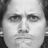


Example of happy image from combined dataset


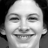


Example of an image from RAF-DB dataset


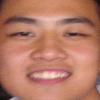

In [ ]:
# Load your data and print 2-3 examples
curr_directory = os.getcwd()
import IPython.display as display

## Example 1
print("Example of angry image from ck+ dataset")
file_path = os.path.join(curr_directory, 'data/ck+/anger/S999_001_00000018.png')
img1 = load_img(file_path)
img1 = img_to_array(img1)
im1 = Image.open(file_path)
display.display(im1)

## Example 2
print("\nExample of happy image from combined dataset")
file_path = os.path.join(curr_directory,'data/combined/happy/S138_005_00000016.png')
img2 = load_img(file_path)
img2 = img_to_array(img2)
im2 = Image.open(file_path)
display.display(im2)

## Example 3
print('\nExample of an image from RAF-DB dataset')
file_path = os.path.join(curr_directory,'data/others/aligned/train_00569_aligned.jpg')
#images = np.load(file_path)
img3 = load_img(file_path)
img3 = img_to_array(img3)
im3 = Image.open(file_path)
display.display(im3)

## Pre-processing

### What features did you use or choose not to use? Why?

We only use the image itseld as our feature because we believe that the face image contains everything we need for the model and neural network is capable of handeling single image as the input.

### If you have categorical labels, were your datasets class-balanced?

Our datasets is not class-balanced that we have more "happy" class than all the other classes.

### How did you deal with missing data? What about outliers?

We don't have missing data, but we do have outlier. We filtered the data with the haar cascade classifier to get rid of the outliers.

### What approach(es) did you use to pre-process your data? Why?

We converted our image data into greyscaled and normalize data. Then, we only choose frontal face image and combine filtered RAF data with CK+ data to build a new dataset for our model.

### Are your features continuous or categorical? How do you treat these features differently?
Our features include just the image itself, so it's hard to say if they are continuous or discrete. In our opinion, we believe that the image data is continuous as it the pixel values are floating points. Each image is represented as an array of pixels. The question as to how we treat these features differently does not really apply as all our features are continuous.



RAF-DB images
Before preprocessing 


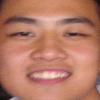


After preprocessing


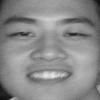

In [ ]:
# For those same examples above, what do they look like after being pre-processed?
# image from CK+ looks the same after preprocessing
print('CK+ images')
print('Before preprocessing ')
display.display()
# image from RAF-DB
print('RAF-DB images')

## originally
print('Before preprocessing ')
display.display(im3)

## preprocessing grayscaling
print('\nAfter preprocessing')
im4 =ImageOps.grayscale(im3)
display.display(im4)


In [ ]:
# Visualize the distribution of your data before and after pre-processing.
#   You may borrow from how we visualized data in the Lab homeworks.

## Note: we showed a few examples in the cell above of the images before and after preprocessing.

## Note also that the images in the CK+ and combined data sets are already in grayscale. 
## Basically, no preprocessing will need to be done on these images

# Models and Evaluation

## Experimental Setup

### How did you evaluate your methods? Why is that a reasonable evaluation metric for the task?

We evaluated our methods by comparing the loss function and accuracy of all of our approaches together.


### What did you use for your loss function to train your models? Did you try multiple loss functions? Why or why not?

For our loss function to train the model, we used categorical cross-entropy function in the TensorFlow.keras. This is a loss function that is commonly used in multi-class classification tasks and the model will  decide which one class of the data is belong to. This loss function will automatically do the tie-breaking for us.

### How did you split your data into train and test sets? Why?

We used split_test_train in the sklearn package and we split our data to 30% testing and 70% training data. In machine learning literatures, researchers commonly follow the 70% training and the 30% testing split. We thus decided to go with that approach to have enough data to train the CNN but also leave out enough data for evaluation down the road. 


In [ ]:
# Code for loss functions, evaluation metrics or link to Git repo
# The codes for the loss functions, and evaluation metrics are found in the train.py file in the Github repo

## Our loss function, as suggested avoce, is the categorical cross-entropy function in the TensorFlow.keras

## Baselines 

### What baselines did you compare against? Why are these reasonable?

We set our baseline to be VGG16/19 whose accuracy on the RAF data is 58%. Since VGG16/19 is the most common neural network used for face recognition problems, which is also suitable for our study.

### Did you look at related work to contextualize how others methods or baselines have performed on this dataset/task? If so, how did those methods do?

Yes we looked at past literatures that used architecture such as VGG16/19, AlexNet, baseDCNN, center loss and DLP-CNN. The average accuracy is around 60% for these models.

## Methods

###What methods did you choose? Why did you choose them?


###How did you train these methods, and how did you evaluate them? Why?

###Which methods were easy/difficult to implement and train? Why?
Our Gabor-CNN3 model are easier to impletment and train because it is not as deep as our Gabor-VGG modelf

###For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense, AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import PReLU
from skimage.filters import gabor_kernel



In [ ]:
class GaborFilterBank(layers.Layer):
    def __init__(self):
        super().__init__()
    
    def build(self, input_shape):
        # assumption: shape is NHWC 
        self.n_channel = input_shape[-1]
        self.kernels = []
        for theta in range(4):
            theta = theta / 4.0 * np.pi
            for sigma in (1, 3):
                for frequency in (0.05, 0.15, 0.25, 0.35):
                    kernel = np.real(
                        gabor_kernel(
                            frequency, theta=theta, sigma_x=sigma, sigma_y=sigma
                        )
                    ).astype(np.float32)
                    # tf.nn.conv2d does crosscorrelation, needs flip
                    kernel = np.flip(kernel)
                    # match the number of channel of the input
                    kernel = np.stack((kernel,)*self.n_channel, axis=-1)
                    # adding the number of out channel : 1
                    kernel = kernel[:, :, : , np.newaxis] 
                    self.kernels.append(tf.Variable(kernel, trainable=False))

    def call(self, x):
        out_list = []
        for kernel in self.kernels:
            out_list.append(tf.nn.conv2d(x, kernel, strides=1, padding="SAME"))
        # output is [batch_size, H, W, 32] 
        # where 32 is the number of filters 
        # ga32 = n_theta * n_sigma * n_freq = 4 * 2 * 4 
        return tf.concat(out_list,axis=-1)

In [ ]:
# Code for training models, or link to your Git repository
## the training models are at the models.py in the Github repository
def GaborCNN3(input_shape=(48, 48, 1), n_classes=7):

    input_layer = Input(shape=input_shape)

    x = GaborFilterBank()(input_layer)


    x = Conv2D(64, (3, 3), strides=1, padding='same')(x)
    x = PReLU()(x)
    x = Conv2D(64, (5, 5), strides=1, padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    x = Conv2D(64, (3, 3), strides=1, padding='same')(x)
    x = PReLU()(x)
    x = Conv2D(64, (5, 5), strides=1, padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    x = Flatten()(x)
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.75)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.75)(x)
    x = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=x)
    return model




def SimpleCNN3(input_shape=(48, 48, 1), n_classes=7):

    input_layer = Input(shape=input_shape)

    x = Conv2D(8, (1, 1), strides=1, padding='same', activation='relu')(input_layer)
    x = PReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    x = Conv2D(16, (3, 3), strides=1, padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    x = Conv2D(32, (5, 5), strides=2, padding='same')(x)
    x = PReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    x = Flatten()(x)
    x = Dense(2048, activation='relu')(x)
    x = Dense(1024, activation='relu')(x)
    x = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=x)
    return model



def VGG16(input_shape=(48, 48, 1), n_classes=7):
    input_layer = Input(shape=input_shape)

    x = GaborFilterBank()(input_layer)
    
    x = Conv2D(64,(3,3),padding="same", activation="relu")(x)
    x = Conv2D(64, (3,3),padding="same", activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2),strides=2)(x)
    x = Conv2D(128, (3,3), padding="same", activation="relu")(x)
    x = Conv2D(128, (3,3), padding="same", activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2),strides=2)(x)
    x = Conv2D(256, (3,3), padding="same", activation="relu")(x)
    x = Conv2D(256, (3,3), padding="same", activation="relu")(x)
    x = Conv2D(256, (3,3), padding="same", activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2),strides=2)(x)
    x = Conv2D(512, (3,3), padding="same", activation="relu")(x)
    x = Conv2D(512, (3,3), padding="same", activation="relu")(x)
    x = Conv2D(512, (3,3), padding="same", activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2),strides=2)(x)
    x = Conv2D(512, (3,3), padding="same", activation="relu")(x)
    x = Conv2D(512, (3,3), padding="same", activation="relu")(x)
    x = Conv2D(512, (3,3), padding="same", activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2),strides=2)(x)
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=input_layer, outputs=x)
    return model

Text(0.5, 1.0, 'Accuracy curves of Simple CNN3 on CK+')

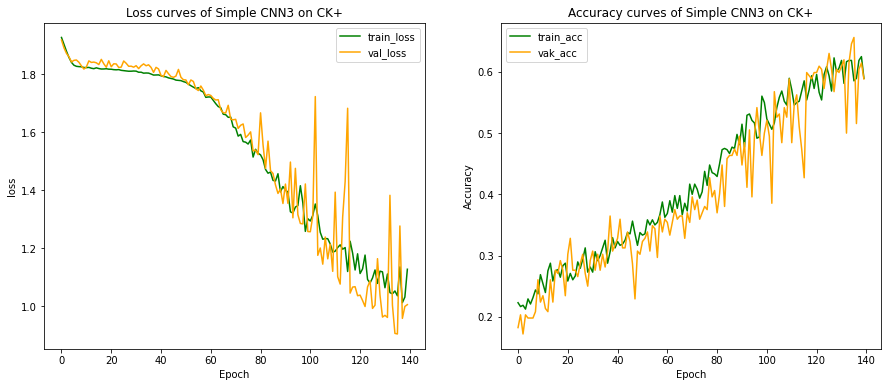

In [ ]:
# Show plots of how these models performed during training.
#  For example, plot train loss and train accuracy (or other evaluation metric) on the y-axis,
#  with number of iterations or number of examples on the x-axis.
import pandas as pd
file_name = os.path.join(os.getcwd(),"output/ck_cnn3_simplecnn_history_array")
df =  pd.read_csv(file_name)


plt.figure(figsize = (15,6))


plt.subplot(121)
plt.plot(df['# train_loss'].values,'green')
plt.plot(df['val_loss'].values,'orange')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.title("Loss curves of Simple CNN3 on CK+")
plt.subplot(122)
plt.plot(df.train_acc.values,'green')
plt.plot(df['val_acc'].values,'orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train_acc','vak_acc'])
plt.title("Accuracy curves of Simple CNN3 on CK+")

Text(0.5, 1.0, 'Accuracy curves of Gabor CNN3 on CK+')

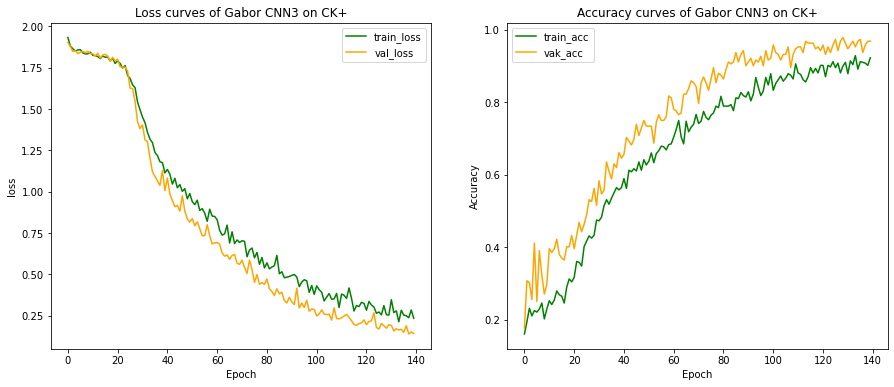

In [ ]:
file_name = os.path.join(os.getcwd(),"output/ck_gaborcnn_history_array")
df =  pd.read_csv(file_name)


plt.figure(figsize = (15,6))


plt.subplot(121)
plt.plot(df['# train_loss'].values,'green')
plt.plot(df['val_loss'].values,'orange')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.title("Loss curves of Gabor CNN3 on CK+")
plt.subplot(122)
plt.plot(df.train_acc.values,'green')
plt.plot(df['val_acc'].values,'orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train_acc','vak_acc'])
plt.title("Accuracy curves of Gabor CNN3 on CK+")

Text(0.5, 1.0, 'Accuracy curves of VGG16 on CK+')

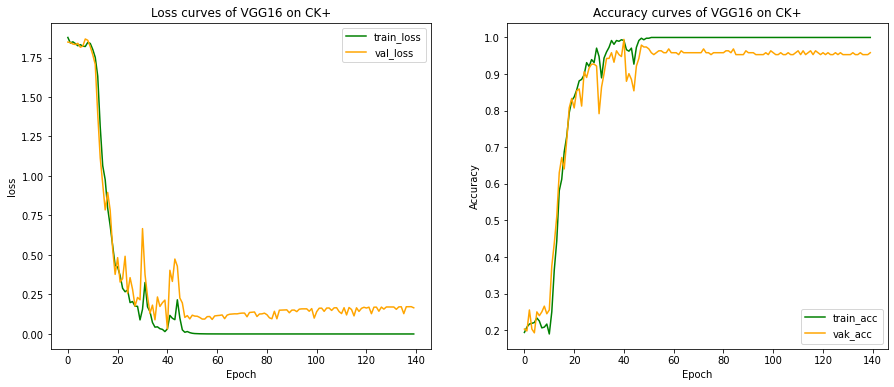

In [ ]:
file_name = os.path.join(os.getcwd(),"output/ck_vgg_history_array")
df =  pd.read_csv(file_name)


plt.figure(figsize = (15,6))


plt.subplot(121)
plt.plot(df['# train_loss'].values,'green')
plt.plot(df['val_loss'].values,'orange')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.title("Loss curves of VGG16 on CK+")
plt.subplot(122)
plt.plot(df.train_acc.values,'green')
plt.plot(df['val_acc'].values,'orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train_acc','vak_acc'])
plt.title("Accuracy curves of VGG16 on CK+")

## Results

###Show tables comparing your methods to the baselines.

###What about these results surprised you? Why?
We are surprised by how easily our Gabor-VGG model tends to overfit and how 

###Did your models over- or under-fit? How can you tell? What did you do to address these issues?

Our Gabor-VGG model tend to over-fit as the figure below shown: while the training accuracy continuously increases, the testing accuracy first goes up and then goes down, indicating overfitting. We address this issue using an earlystopper mechanism to stop overfitting.

###What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data? 

We do expect our model to behave in the following performance: CK+ > Combined > RAF, and our evaluation is consistant with our expectation. Our evaluation shows that the RAF data, our original selection, contains too many outliers or noise since the accuracy of RAF in all of our model or in all of the previous published work related to it are all below 60%.

In [ ]:
# Show plots or visualizations of your evaluation metric(s) on the train and test sets.
#   What do these plots show about over- or under-fitting?
#   You may borrow from how we visualized results in the Lab homeworks.
#   Are there aspects of your results that are difficult to visualize? Why?

Text(0.5, 1.0, 'Accuracy curves of different models on CK+')

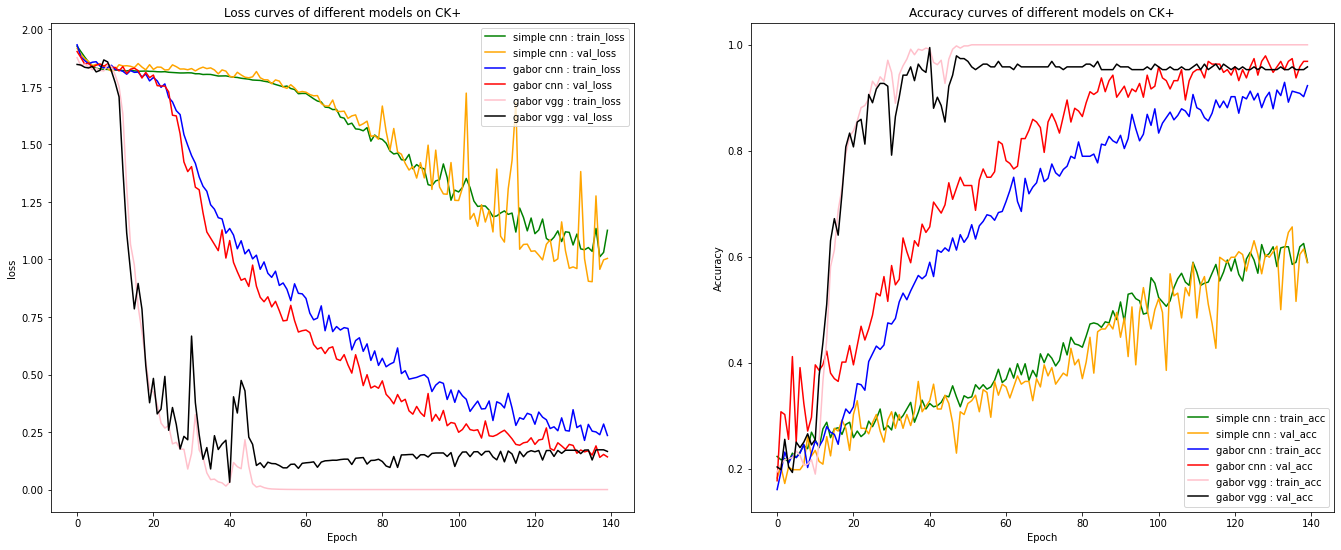

In [ ]:
df1 = pd.read_csv(os.path.join(os.getcwd(),"output/ck_cnn3_simplecnn_history_array"))
df2 = pd.read_csv(os.path.join(os.getcwd(),"output/ck_gaborcnn_history_array"))
df3 = pd.read_csv(os.path.join(os.getcwd(),"output/ck_vgg_history_array"))

plt.figure(figsize = (23,9))

plt.subplot(121)
plt.plot(df1['# train_loss'].values,'green',label="simple cnn : train_loss")
plt.plot(df1['val_loss'].values,'orange',label="simple cnn : val_loss")
plt.plot(df2['# train_loss'].values,'blue',label="gabor cnn : train_loss")
plt.plot(df2['val_loss'].values,'red',label="gabor cnn : val_loss")
plt.plot(df3['# train_loss'].values,'pink',label="gabor vgg : train_loss")
plt.plot(df3['val_loss'].values,'black',label="gabor vgg : val_loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.title("Loss curves of different models on CK+")
plt.subplot(122)
plt.plot(df1.train_acc.values,'green',label="simple cnn : train_acc")
plt.plot(df1['val_acc'].values,'orange',label="simple cnn : val_acc")
plt.plot(df2.train_acc.values,'blue',label="gabor cnn : train_acc")
plt.plot(df2['val_acc'].values,'red',label="gabor cnn : val_acc")
plt.plot(df3.train_acc.values,'pink',label="gabor vgg : train_acc")
plt.plot(df3['val_acc'].values,'black',label="gabor vgg : val_acc")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy curves of different models on CK+")

Text(0.5, 1.0, 'Accuracy curves of Gabor CNN3 on Combined dataset')

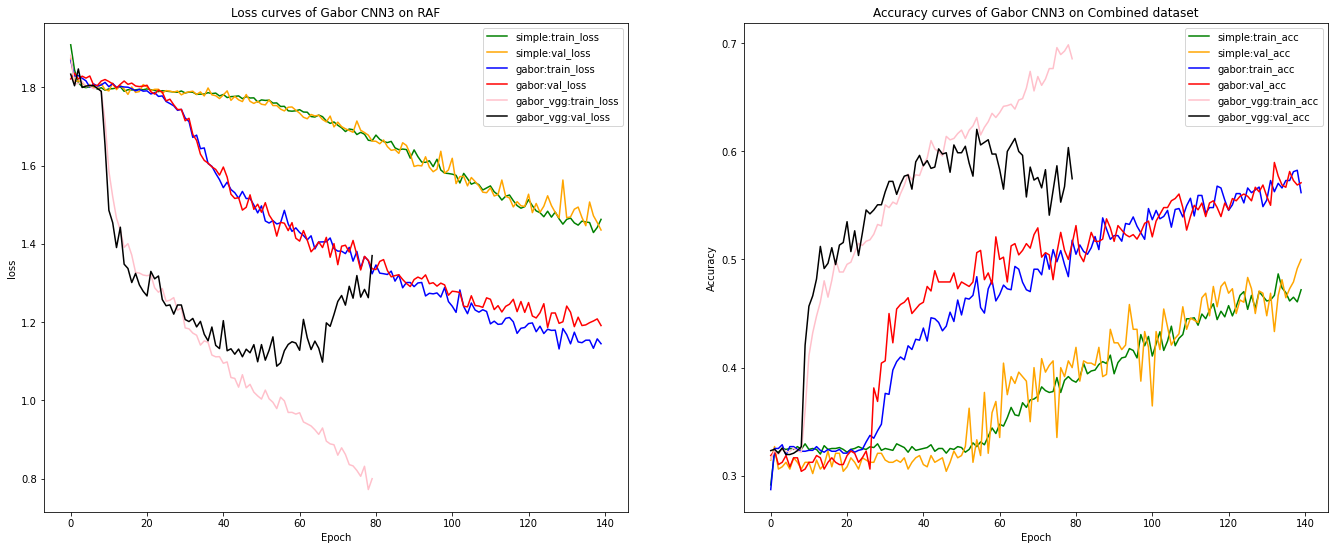

In [ ]:
file_name = os.path.join(os.getcwd(),"output/combined_cnn3_simplecnn_history_array")
df =  pd.read_csv(file_name)
dat = pd.read_csv(os.path.join(os.getcwd(),"output/combined_gabor_simplecnn_history_array"))
df2 = pd.read_csv(os.path.join(os.getcwd(),"output/combined_vgg_history_array"))


plt.figure(figsize = (23,9))


plt.subplot(121)
plt.plot(df['# train_loss'].values,'green')
plt.plot(df['val_loss'].values,'orange')
plt.plot(dat['# train_loss'].values,'blue')
plt.plot(dat['val_loss'].values,'red')
plt.plot(df2['# train_loss'].values,'pink')
plt.plot(df2['val_loss'].values,'black')


plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['simple:train_loss','simple:val_loss','gabor:train_loss','gabor:val_loss','gabor_vgg:train_loss','gabor_vgg:val_loss'])
plt.title("Loss curves of Gabor CNN3 on RAF")
plt.subplot(122)
plt.plot(df.train_acc.values,'green')
plt.plot(df['val_acc'].values,'orange')
plt.plot(dat.train_acc.values,'blue')
plt.plot(dat['val_acc'].values,'red')
plt.plot(df2.train_acc.values,'pink')
plt.plot(df2['val_acc'].values,'black')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['simple:train_acc','simple:val_acc','gabor:train_acc','gabor:val_acc','gabor_vgg:train_acc','gabor_vgg:val_acc'])
plt.title("Accuracy curves of Gabor CNN3 on Combined dataset")

# Discussion

## What you've learned

*Note: you don't have to answer all of these, and you can answer other questions if you'd like. We just want you to demonstrate what you've learned from the project.*

### What concepts from lecture/breakout were most relevant to your project? How so?

The concept that was most relevant the the project is deep learning and convolutional network. Through the lectures on the Deep Learning and Convolutional Neural networks, we are able to learn about how CNNs extract features from images (which can be applied to our problem). The lectures also cover training CNN models, which we applied towards this project. In fact, this project builds on top of the facial recognition of CNN discussed in lecture.

### What aspects of your project did you find most surprising?

We were more surprised about how difficult it is to tune and train a model for real-life application. The majority time of our project has been spent on building different models, tuning paramters to increase the accuracy.

### What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?

We learned that using the right tools would greatly help with building and training the model. Particularly, we switched from using PyTorch which learned from class to Tensorflow in the middle of the project. This gives us better efficiency and result for the model and we will probably use this for the next similar project in neural network. 

### What was the most helpful feedback you received during your presentation? Why?

We received a lot of useful feedback from other groups. Some of which are particularly helpful for our project. First of all, three out of four groups raised the question on how we should increase the accuracy of our model (which at the time had around 36%) to our baseline target of 60%. Secondly, two out of four groups askes us how long does it take to analyze each frame/picture with our model since for real-time detection, since it is very important to process fast. One group also raised the concern of ethical implications for the application of real-time sentiment identification for factors such as racial or gender bias. This is something we have not implemented but need to think about in the future for similar project. We also got inspiration from other group's project's performance improvement strategy so we switched from pytorch to tensorflow.

### If you had two more weeks to work on this project, what would you do next? Why?

If we had two more weeks to work on this project, we would complete the model for compound emotion. In addition, we would like to use some cloud services such as Azuer ML or AWS with more GPU power as currently we train our model on our local machines. This would also enable us to try more complex architecture. Lastly, we would also like to introduce other mechanisms such as attention or RCNN which helps us to achieve faster recognition for frames in the video.